<a href="https://www.kaggle.com/code/aayushsin7a/nyc-taxi-fare-prediction?scriptVersionId=148001428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import the required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("All the libraries loaded successfully")

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
All the libraries loaded successfully


In [2]:
datatype = {"key":"object","fare_amount":"float64","pickup_datetime":"object",
            "pickup_longitude":"float64","pickup_latitude":"float64","dropoff_longitude":"float64","dropoff_latitude":"float64",
           "passenger_count":"int64"
           }

df = pd.read_csv("/kaggle/input/new-york-city-taxi-fare-prediction/train.csv",low_memory=False,nrows=10**5,dtype=datatype,parse_dates=['pickup_datetime'])
df.drop(['key'],axis=1,inplace=True)

df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
# Print the shape of the dataset
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (100000, 7)


# Data Dictionary
- 

In [4]:
# Creatibng datetime features based on pickup_datetime

import calendar

df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_day'] = df['pickup_datetime'].apply(lambda x:x.day)
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x:x.hour)
df['pickup_day_of_week'] = df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df['pickup_month'] = df['pickup_datetime'].apply(lambda x:x.month)
df['pickup_year'] = df['pickup_datetime'].apply(lambda x:x.year)

df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [5]:
# Describe the data 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820,15.664270,13.495110,6.261230,2011.74389
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171,8.677631,6.507434,3.450569,1.86602
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.00000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000,8.000000,9.000000,3.000000,2010.00000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000,16.000000,14.000000,6.000000,2012.00000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000,23.000000,19.000000,9.000000,2013.00000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000,31.000000,23.000000,12.000000,2015.00000


# Observations 
- Minimum fare amount is negative
- Coordinates ( doesn't appear to be in range ); looks unreal, must be between -74 and 41. 
- Minimum passenger count is 0 

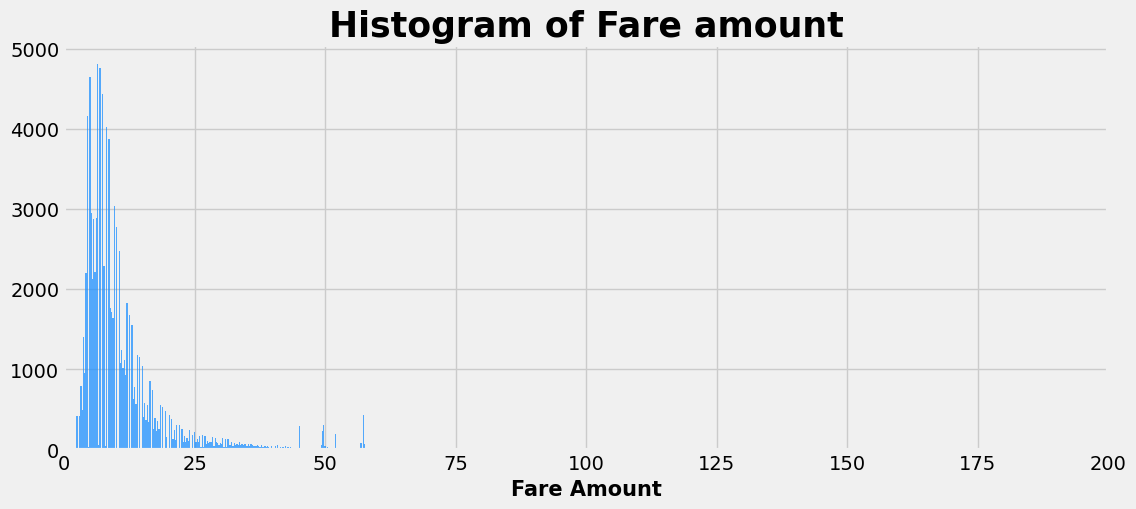

In [6]:
# Visualize the fare amount
plt.figure(figsize = (12,5))
n, bins, patches = plt.hist(df.fare_amount,1000, facecolor="dodgerblue",alpha=0.75)
plt.xlabel("Fare Amount", fontsize=15,fontweight='bold')
plt.title("Histogram of Fare amount",fontsize=25,fontweight='bold')
plt.xlim(0,200)
plt.show();

In [7]:
# Remove 0 passenger count 
# the initial taxi fare is $2.5, so we can remove the fares below it

# Outlier treatment 

In [8]:
df = df[((df['pickup_longitude'] > - 78)&
        (df['pickup_longitude']< -70 ))&
        
        ((df['dropoff_longitude']> -78)&
        (df['dropoff_longitude']< -70))&
        
        ((df['pickup_latitude'] > 37) &
        (df['pickup_latitude']< 45))&
        
        ((df['dropoff_latitude']>37)&
        (df['dropoff_latitude']<45))&
        
        (df['passenger_count']>0)&
        (df['fare_amount']>=2.5)]

In [9]:
# Observe the change in the data 
